## ----------------------------------  Classification of Retailers  -----------------------------------

In [1]:
import numpy as np
import pandas as pd

from sklearn.cluster import KMeans

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_excel("C:\\Users\\91969\\Desktop\\Markytics\\Case Study Data 1.xlsx")

In [3]:
data.head()

,Retailer Name,Brand1,Brand2,Brand3,Brand4,Brand5,Brand6,Brand7,Brand8,Brand9,Brand10,Brand11,Brand12,Total Sales,Number of Brands,Category of Retailer
0,Retailer 1,0.0000,0.0,0.0,0.000,0.0000,0.0,0.0,0.0,0.000,30826.61,0.0,0.0,30826.6100,1,NaN
1,Retailer 2,9833.1060,0.0,0.0,24073.632,33806.4312,0.0,0.0,0.0,0.000,0.00,0.0,0.0,67713.1692,3,NaN
2,Retailer 3,24690.6708,0.0,0.0,0.000,27367.0386,0.0,0.0,0.0,12948.696,0.00,0.0,0.0,65006.4054,3,NaN
3,Retailer 4,0.0000,0.0,0.0,0.000,0.0000,0.0,0.0,0.0,0.000,0.00,0.0,0.0,0.0000,0,NaN
4,Retailer 5,0.0000,0.0,0.0,0.000,0.0000,0.0,0.0,0.0,0.000,0.00,0.0,0.0,0.0000,0,NaN


##### Retailer Name : There are total 9938 unique retailers in this area
##### Brands : Total 12 different brands can be sold to retailer 
##### Total Sales : This is sum total of sales of all brands 
##### Number of Brands : Total number of unique brands purchased by retailers
##### Values are in Rupees for Brands Sales and Total Sales

In [4]:
### To show highest frequency in Number of Brands cloumn

data["Number of Brands"].value_counts()

0    6449
1    1453
2     717
3     577
4     355
5     213
6     103
7      55
8      14
9       2
Name: Number of Brands, dtype: int64

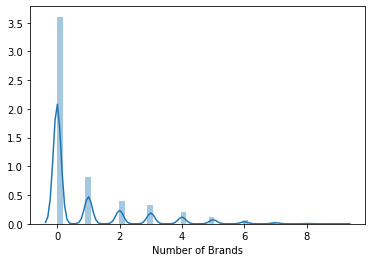

In [6]:
sns.distplot(data["Number of Brands"])

### To Find 3-Cluster using KMeans

In [7]:
X = data.values[:,[-3,-2]]              ## Selecting "Total Sales" and "Number of Brands" columns
print(X)

[[30826.609999999997 1]
 [67713.16919999999 3]
 [65006.405399999996 3]
 ...
 [0.0 0]
 [48324.57399999999 2]
 [0.0 0]]


In [8]:
X_new=X[:,1]                           ## Selecting "Number of Brands" and reshaping into the row form
X_new=np.reshape(X_new,(-1,1))
print(X_new)

[[1]
 [3]
 [3]
 ...
 [0]
 [2]
 [0]]


In [9]:
kmeans = KMeans(n_clusters=3,random_state=10)
clusters = kmeans.fit_predict(X_new)
print(clusters)

[0 2 2 ... 0 2 0]


In [10]:
fig = plt.figure(figsize=(10, 7))

<Figure size 720x504 with 0 Axes>

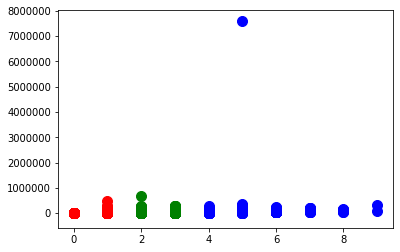

In [11]:
plt.scatter(X[clusters == 0, 1], X[clusters == 0, 0], s = 100, c = "red", label = "Cluster1")
plt.scatter(X[clusters == 1, 1], X[clusters == 1, 0], s = 100, c = "blue", label = "Cluster2")
plt.scatter(X[clusters == 2, 1], X[clusters == 2, 0], s = 100, c = "green", label = "Cluster3")

In [12]:
fig = plt.figure(figsize=(10, 7))

<Figure size 720x504 with 0 Axes>

##### Renaming the cluster number to Category A , B & C and aslo changes in color as par our power point sheet 
##### Retailers can be classified as Category A, B & C. 
##### Category A retailers are one who place regular orders and Category C are one who place irregular orders.

##### Cluster = 0 (Categoty C)
##### Cluster = 1 (Categoty A)
##### Cluster = 2 (Categoty B)

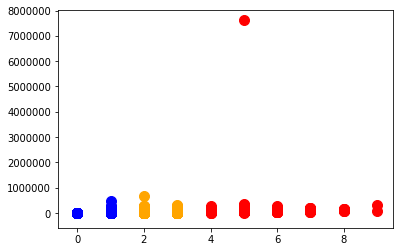

In [14]:
plt.scatter(X[clusters == 1, 1], X[clusters == 1, 0], s = 100, c = "red", label = "Category A")
plt.scatter(X[clusters == 2, 1], X[clusters == 2, 0], s = 100, c = "orange", label = "Category B")
plt.scatter(X[clusters == 0, 1], X[clusters == 0, 0], s = 100, c = "blue", label = "Category C")

In [15]:
### Substituting the cluster to the data file

data['Category of Retailer'] =clusters

In [16]:
data.head(2)

,Retailer Name,Brand1,Brand2,Brand3,Brand4,Brand5,Brand6,Brand7,Brand8,Brand9,Brand10,Brand11,Brand12,Total Sales,Number of Brands,Category of Retailer
0,Retailer 1,0.000,0.0,0.0,0.000,0.0000,0.0,0.0,0.0,0.0,30826.61,0.0,0.0,30826.6100,1,0
1,Retailer 2,9833.106,0.0,0.0,24073.632,33806.4312,0.0,0.0,0.0,0.0,0.00,0.0,0.0,67713.1692,3,2


In [17]:
##  Renaming the cluster number to Category A , B & C in the data file

data['Category of Retailer']=data['Category of Retailer'].map({0:'Category C' , 1:'Category A' , 2:'Category B'})

In [18]:
data.head(2)

,Retailer Name,Brand1,Brand2,Brand3,Brand4,Brand5,Brand6,Brand7,Brand8,Brand9,Brand10,Brand11,Brand12,Total Sales,Number of Brands,Category of Retailer
0,Retailer 1,0.000,0.0,0.0,0.000,0.0000,0.0,0.0,0.0,0.0,30826.61,0.0,0.0,30826.6100,1,Category C
1,Retailer 2,9833.106,0.0,0.0,24073.632,33806.4312,0.0,0.0,0.0,0.0,0.00,0.0,0.0,67713.1692,3,Category B


In [19]:
data['Category of Retailer'].value_counts()

Category C    7902
Category B    1294
Category A     742
Name: Category of Retailer, dtype: int64

#### Final Submission File

In [21]:
data.to_excel("category of Retailer.xlsx")

#### Some Extra Analysis Based on Category A , B & C

In [22]:
data.groupby(["Category of Retailer"]).mean()

,Brand1,Brand2,Brand3,Brand4,Brand5,Brand6,Brand7,Brand8,Brand9,Brand10,Brand11,Brand12,Total Sales,Number of Brands
Category of Retailer,,,,,,,,,,,,,,
Category A,9550.660114,874.891373,13.166138,9246.610674,15541.883767,5742.440722,11323.913050,3294.142604,15027.700470,8495.143311,5133.595597,824.317399,86297.360751,4.876011
Category B,5046.712399,387.156718,0.000000,8368.718801,5744.232087,3428.571708,2228.561196,1933.541473,7333.591712,4515.139446,2361.497891,257.176234,42163.537742,2.445904
Category C,322.901852,53.084654,0.000000,1117.566524,1237.707913,424.474126,61.816355,154.490497,514.648670,492.524893,69.843997,4.921175,4501.748894,0.183877


In [23]:
data.groupby(["Category of Retailer"]).sum()

,Brand1,Brand2,Brand3,Brand4,Brand5,Brand6,Brand7,Brand8,Brand9,Brand10,Brand11,Brand12,Total Sales,Number of Brands
Category of Retailer,,,,,,,,,,,,,,
Category A,7.086590e+06,649169.3984,9769.2744,6.860985e+06,1.153208e+07,4.260891e+06,8.402343e+06,2.444254e+06,1.115055e+07,6.303396e+06,3.809128e+06,611643.5100,6.403264e+07,3618
Category B,6.530446e+06,500980.7928,0.0000,1.082912e+07,7.433036e+06,4.436572e+06,2.883758e+06,2.502003e+06,9.489668e+06,5.842590e+06,3.055778e+06,332786.0466,5.455962e+07,3165
Category C,2.551570e+06,419474.9320,0.0000,8.831011e+06,9.780368e+06,3.354195e+06,4.884728e+05,1.220784e+06,4.066754e+06,3.891932e+06,5.519073e+05,38887.1226,3.557282e+07,1453
